The dataset comes from [this website](https://www.cityscapes-dataset.com/dataset-overview/) and you can download it at [this direct link](https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/files/AI+Engineer/Project+8+-+Participez+%C3%A0+la+conception+d'une+voiture+autonome/P8_Cityscapes_gtFine_trainvaltest.zip).

A faire :
- [x] Comprendre pourquoi les métriques sont aussi basses. Cherche de nouvelles métrique. Enregistrer l'entrainement avec loss, accuracy, etc.
    Les métriques ont l'air bonnes, je les ai refaites via une autre méthode et elles sont similaires.
- [x] Essayer de décrire plus ce que ces métriques représentent (dans le document)
- [x] Essayer de trouver d'autres métriques (accuracy, F1 score est trop embettant à calculer pour peu d'amélioration)
- [x] Essayer d'hériter des classes de Keras pour faire un générator qui sera passé dans train de keras segmentation (en premier, rechercher les paramètres de keras_segmentation.train)
- [ ] Faire un entrainement de 3 modèles :
  - [ ] Un modèle fcn32 sans data augmentation
  - [ ] Un modèle fcn32 avec data augmentation
  - [ ] Un modèle vgg_pspnet sans data augmentation
  - [ ] Un modèle vgg_pspnet avec data augmentation

Ressources :
1. Un guide classique sur la segmentation image avec exactement ce dataset [ici](https://divamgupta.com/image-segmentation/2019/06/06/deep-learning-semantic-segmentation-keras.html)
2. A entrainé Unet sur le dataset [ici](https://github.com/srihari-humbarwadi/cityscapes-segmentation-with-Unet)
3. Kaggle d'entrainement de PSPNet sur le dataset [ici](https://www.kaggle.com/code/santhalnr/cityscapes-image-segmentation-pspnet/notebook)
4. La doc de python [ici](https://docs.python.org/3/index.html)
   

# Gathering the data

## Downloading

In [3]:
import zipfile
import urllib

from url import file1_url, file2_url

# Will try to download the files

# Dataset archive whith labels
file_path = 'P8_Cityscapes_gtFine_trainvaltest.zip'
# Dataset archive with images
file_path_2 = 'P8_Cityscapes_leftImg8bit_trainvaltest.zip'

# Check if file exists
if not os.path.isfile(file_path):
    print(f'{file_path} archive does not exist. Downloading from internet...')
    urllib.request.urlretrieve(file1_url, file_path)
    print('Download complete.')

# Check if file exists
if not os.path.isfile(file_path_2):
    print(f'{file_path_2} archive does not exist. Downloading from internet...')
    urllib.request.urlretrieve(file2_url, file_path_2)
    print('Download complete.')


## Extraction

In [4]:
# Create another directory and extract the file in it
path_to_extract = f'dataset/'

with zipfile.ZipFile(file_path, 'r') as zip_ref:
    zip_ref.extractall(path_to_extract)

# Create another directory and extract the file in it
with zipfile.ZipFile(file_path_2, 'r') as zip_ref:
    zip_ref.extractall(path_to_extract)

# Sorting images and preprocessing

We know that we need to sort images into folder for training, testing and validation.

## Sorting images into folders

In [5]:
import shutil
import os
import random
from tqdm.autonotebook import tqdm
import numpy as np
from labels import *
import cv2
import matplotlib.pyplot as plt

training_folder = r"dataset\leftImg8bit\train"

# List of all subfolders
subfolders = os.listdir(training_folder)

# List of all images paths in the subfolders
images = []
for subfolder in subfolders:
    for image in os.listdir(os.path.join(training_folder, subfolder)):
        images.append(os.path.join(training_folder, subfolder, image))


# Same for labelling
labelling_folder = r"dataset\gtFine\train"

# List of all subfolders
subfolders = os.listdir(labelling_folder)

# List of all images paths in the subfolders
labels_images = []
for subfolder in subfolders:
    for image in os.listdir(os.path.join(labelling_folder, subfolder)):
        if image.endswith('labelIds.png'):
            labels_images.append(os.path.join(labelling_folder, subfolder, image))

tuple_images_labels = list(zip(images, labels_images))


# Same for validation
validation_folder = r"dataset\leftImg8bit\val"

# List of all subfolders
subfolders = os.listdir(validation_folder)

# List of all images paths in the subfolders
val_images = []
for subfolder in subfolders:
    for image in os.listdir(os.path.join(validation_folder, subfolder)):
        val_images.append(os.path.join(validation_folder, subfolder, image))


# Same for labelling
validation_labelling_folder = r"dataset\gtFine\val"

# List of all subfolders
subfolders = os.listdir(validation_labelling_folder)

# List of all images paths in the subfolders
val_labels_images = []
for subfolder in subfolders:
    for image in os.listdir(os.path.join(validation_labelling_folder, subfolder)):
        if image.endswith('labelIds.png'):
            val_labels_images.append(os.path.join(validation_labelling_folder, subfolder, image))

tuple_val_images_labels = list(zip(val_images, val_labels_images))

C:\Users\barau\AppData\Local\Temp\ipykernel_16064\2284536762.py:4: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


In [6]:
# Creating folder training_data
training_data_folder = r"processed_data\training_data"
if os.path.exists(training_data_folder):
    shutil.rmtree(training_data_folder)
os.makedirs(training_data_folder)

# Creating training_labels folder
training_labels_folder = r"processed_data\training_labels"
if os.path.exists(training_labels_folder):
    shutil.rmtree(training_labels_folder)
os.makedirs(training_labels_folder)

for image, label in random.choices(tuple_images_labels, k=1000):
    # get image name
    image_name = os.path.basename(image)[:-16] + '.png'
    # Copy image to training_data folder and rename it
    shutil.copy(image, os.path.join(training_data_folder, image_name))
    # Copy label to training_labels folder
    shutil.copy(label, os.path.join(training_labels_folder, image_name))




# Creating validation_data folder
validation_data_folder = r"processed_data\validation_data"
if not os.path.exists(validation_data_folder):
    os.makedirs(validation_data_folder)

# Creating validation_labels folder
validation_labels_folder = r"processed_data\validation_labels"
if not os.path.exists(validation_labels_folder):
    os.makedirs(validation_labels_folder)

for image, label in random.choices(tuple_val_images_labels, k=10):
    # get image name
    image_name = os.path.basename(image)[:-16] + '.png'
    # Copy image to validation_data_folder folder and rename it
    shutil.copy(image, os.path.join(validation_data_folder, image_name))
    # Copy label to validation_labels_folder folder
    shutil.copy(label, os.path.join(validation_labels_folder, image_name))

# Creating validation_labels_pred folder for predictions
validation_labels_pred_folder = r"processed_data\validation_labels_pred"
if not os.path.exists(validation_labels_pred_folder):
    os.makedirs(validation_labels_pred_folder)

## Resizing images

Many models require images to be of a certain size. We make a function to make it easier when we'll choose our model.

In [7]:
training_size = (384, 576)

def resize_images(folder, new_size):
    print(f"Resizing images in {folder} to {new_size} ...")
    for image in tqdm(os.listdir(folder)):
        img = cv2.imread(os.path.join(folder, image))
        img = cv2.resize(img, new_size)
        cv2.imwrite(os.path.join(folder, image), img)
    print("Done")

# Resizing images
resize_images(training_data_folder, training_size)
resize_images(training_labels_folder, training_size)
resize_images(validation_data_folder, training_size)
resize_images(validation_labels_folder, training_size)

Resizing images in processed_data\training_data to (384, 576) ...


100%|██████████| 854/854 [00:52<00:00, 16.31it/s]


Done
Resizing images in processed_data\training_labels to (384, 576) ...


100%|██████████| 854/854 [00:18<00:00, 45.54it/s]


Done
Resizing images in processed_data\validation_data to (384, 576) ...


100%|██████████| 10/10 [00:00<00:00, 14.79it/s]


Done
Resizing images in processed_data\validation_labels to (384, 576) ...


100%|██████████| 10/10 [00:00<00:00, 46.96it/s]

Done


## Converting the labels to their categories id

Let's convert id of the label to the category id because we only need to predict those 8 categories and not the 30+ labels. You'll find the difference [here](https://www.cityscapes-dataset.com/dataset-overview/#class-definitions).

In [8]:
categories = [
    'flat',
    'human',
    'vehicle',
    'construction',
    'object',
    'nature',
    'sky',
    'void'
]

# Create dictionnary for {labelId : label}
id2categoryId = { int(label.id) : int(label.categoryId) for label in labels}

# Create a lambda function that returns the categoryId of a labelId
getCatId = lambda labelId: id2categoryId[labelId]

# Create a vectorized function
matrixId2categoryId = np.vectorize(getCatId)

def convert_labels(folder):
    print(f"Converting labels in {folder} ...")
    for image in tqdm(os.listdir(folder)):
        img = cv2.imread(os.path.join(folder, image))
        img = matrixId2categoryId(img)
        cv2.imwrite(os.path.join(folder, image), img)
    print("Done")

In [9]:
convert_labels(training_labels_folder)
convert_labels(validation_labels_folder)

Converting labels in processed_data\training_labels ...


100%|██████████| 854/854 [01:05<00:00, 12.95it/s]


Done
Converting labels in processed_data\validation_labels ...


100%|██████████| 10/10 [00:00<00:00, 16.06it/s]

Done


# Getting familiar with the keras_segmentation library

## Creating a method to evaluate the model

In [10]:
import random
import imgaug
import keras

# It is not possible to evaluate this model because it was trained on other classes/labels than the ones we want to predict
# But for future models :

def show_metrics(evaluation):
    print(f"Mean IU : {round(evaluation['mean_IU'],3)}")
    categories_set = {label.categoryId : label.name for label in labels}
    for i, cat in enumerate(categories_set):
        print(f"-- {categories_set[cat]} : {round(evaluation['class_wise_IU'][i],3)} IU")

def keras_evaluate(model, validation_data_folder, validation_labels_folder):
    # Via keras segmentation. We'll prefer doing our own calculations
    evaluation = model.evaluate_segmentation(inp_images_dir=validation_data_folder  , annotations_dir=validation_labels_folder)
    show_metrics(evaluation)

def make_predictions(model, validation_data_folder, validation_labels_folder, validation_labels_pred_folder):
    # Predict every images in the validation folder
    for i, image in enumerate(os.listdir(validation_data_folder)):
        # Getting path of image, label and label_pred
        image_path = os.path.join(validation_data_folder, image)
        label_pred_path = os.path.join(validation_labels_pred_folder, image)

        # prediction
        out = model.predict_segmentation(inp=image_path, out_fname=label_pred_path)
        # creating the prediction file
        cv2.imwrite(label_pred_path, out)

    return validation_labels_pred_folder

def display_one_prediction(validation_data_folder, validation_labels_folder, validation_labels_pred_folder):

    # pick one image
    image_name = random.choice(os.listdir(validation_data_folder))
    # read image
    image = cv2.imread(os.path.join(validation_data_folder, image_name))

    # read label and prediction
    label_path = os.path.join(validation_labels_folder, image_name)
    label = cv2.imread(label_path)[:, :, :1]

    label_pred_path = os.path.join(validation_labels_pred_folder, image_name)
    label_pred = cv2.imread(label_pred_path)[:, :, :1]

    # display
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 8))
    axes[0].imshow(image)
    axes[0].set_title("Image")

    seg_label_map = imgaug.augmentables.segmaps.SegmentationMapOnImage(
        label, shape=image.shape, nb_classes=8
    )
    segmentation_image = seg_label_map.draw_on_image(image)
    axes[1].imshow(segmentation_image)
    axes[1].set_title("Annotation")

    seg_label_pred_map = imgaug.augmentables.segmaps.SegmentationMapOnImage(
        label_pred, shape=image.shape, nb_classes=8
    )
    segmentation_pred_image = seg_label_pred_map.draw_on_image(image)
    axes[2].imshow(segmentation_pred_image)
    axes[2].set_title("Prediction")

    plt.show()


def calculate_metrics(validation_labels_folder, validation_labels_pred_folder):
    # List of every images predicted, with list_metrics[i][0] = mean IoU and list_metrics[i][1:8] = IoU for each of the eight classes
    list_metrics = []


    for i, labels in enumerate(os.listdir(validation_labels_folder)):
        meanIoU_metric = keras.metrics.MeanIoU(num_classes=8)
        meanIoU_metric.reset_states()

        accuracy_metric = keras.metrics.Accuracy()
        accuracy_metric.reset_states()
        
        list_metric = []
        
        # Open labels
        label = cv2.imread(os.path.join(validation_labels_folder, labels), cv2.IMREAD_COLOR)[:,:,:1]
        label_pred = cv2.imread(os.path.join(validation_labels_pred_folder, labels), cv2.IMREAD_COLOR)[:, :, :1]

        # make sure they are the same size
        label = cv2.resize(label, (label_pred.shape[1], label_pred.shape[0]), interpolation=cv2.INTER_NEAREST)
        
        meanIoU_metric.update_state(label, label_pred)
        list_metric.append(meanIoU_metric.result().numpy())
        accuracy_metric.update_state(label, label_pred)
        list_metric.append(accuracy_metric.result().numpy())

        for i in range(8):
            ioU_metric = keras.metrics.IoU(num_classes=8, target_class_ids=[i])
            ioU_metric.reset_states()
            ioU_metric.update_state(label, label_pred)
            list_metric.append(ioU_metric.result().numpy())

        list_metrics.append(list_metric)

    # Make the mean of all the metrics
    mean_metrics = np.mean(list_metrics, axis=0)
    print("Accuracy :", mean_metrics[1])
    print("Mean IoU :", mean_metrics[0])
    print("IoU for each class :")
    for i in range(8):
        print(f"    Class {categories[i]} : {round(mean_metrics[i+2]*100,1)}%")

    return mean_metrics




def evaluate_seg_model(model, validation_data_folder, validation_labels_folder, validation_labels_pred_folder, prediction = True, display = True):
    if prediction:
        make_predictions(model, validation_data_folder, validation_labels_folder, validation_labels_pred_folder)

    if display:
        display_one_prediction(validation_data_folder, validation_labels_folder, validation_labels_pred_folder)
    
    # Calculating metrics
    metrics = calculate_metrics(validation_labels_folder, validation_labels_pred_folder)

    return metrics

# Data augmentation

Because we have a lot of data but very similar data (frames differ lightly from each other), we will use data augmentation to increase divergence over the data.
From [this article](https://nbviewer.org/github/aleju/imgaug-doc/blob/master/notebooks/C03%20-%20Stochastic%20and%20Deterministic%20Augmentation.ipynb), we can see that we can just feed the image and the labels in the same function to apply the same transformation.

> Note: While it is possible to augment multi-input data (e.g. images + bounding boxes) by switching manually to deterministic mode, as described in this notebook, the recommended way is to feed all inputs at the same time into the augmentation call. E.g. one could use augmenter(images=images, bounding_boxes=bbs) to augment both images and bounding boxes on them in the same way. Aside from images and bounding_boxes, the method also accepts heatmaps, segmentation_maps, keypoints, line_strings and polygons as parameters.

Doc [here](https://imgaug.readthedocs.io/en/latest/source/examples_segmentation_maps.html) and notebook on segmentation map augmentation [here](https://nbviewer.org/github/aleju/imgaug-doc/blob/master/notebooks/B05%20-%20Augment%20Segmentation%20Maps.ipynb)

In [11]:
import imgaug as ia
import imgaug.augmenters as iaa
from imgaug.augmentables.segmaps import SegmentationMapOnImage
import random
from tqdm import tqdm

seq = iaa.Sequential([
    iaa.Crop(px=(0, 50)), # crop images from each side by 0 to 16px (randomly chosen)
    iaa.Fliplr(0.5), # horizontally flip 50% of the images
    iaa.GaussianBlur(sigma=(0, 3.0)), # blur images with a sigma of 0 to 3.0
    iaa.Affine(rotate=(-45, 45)), # Add rotation
])

def augment_seg( img , seg  ):
	# Make the sequence of transformation deterministic, meaning that the parameters aren't randomized at every call
    # Useful for dual image transformation like our image/label pair
	aug_det = seq.to_deterministic() 

    # Augment the image or the batch
	image_aug = aug_det.augment_image( img )

    # Create a segmentation map (what we call labels)
	segmap = SegmentationMapOnImage( seg , shape=img.shape , nb_classes=8)
    # Get only the augmentation that will be applied to the segmentation labels (etc : flip : yes, crop : yes, blur : no)
	segmap_aug = aug_det.augment_segmentation_maps( segmap )

	return image_aug , segmap_aug

def augment_images(folder_images, folder_label, augment_percentage):
    # print(f"Augmenting images in {folder_images} ...")
    images_list_in_folder = os.listdir(folder_images)
    base_url = os.path.dirname(folder_images)
    nb_images = int(len(images_list_in_folder) * augment_percentage/100)
    # print(f"{nb_images} images will be augmented")

    choosen_images = random.choices(images_list_in_folder, k=nb_images)

    for image in tqdm(choosen_images):
        image_path = os.path.join(folder_images, image)
        # print(f"Augmenting : {image_path}")
        label_path = os.path.join(folder_label, image)
        # print(f"Label path : {label_path}")


        img = cv2.imread(image_path)
        seg = cv2.imread(label_path)[:,:,:1]
        image_aug , segmap_aug = augment_seg(img, seg)
        
        augment_image_url = os.path.join(folder_images, f"augmented_{image}")
        # print(f"Augmented image url : {augment_image_url}")
        cv2.imwrite(augment_image_url, image_aug)

        augment_label_url = os.path.join(folder_label, f"augmented_{image}")
        # print(f"Augmented label url : {augment_label_url}")
        cv2.imwrite(augment_label_url, segmap_aug.get_arr_int())
    

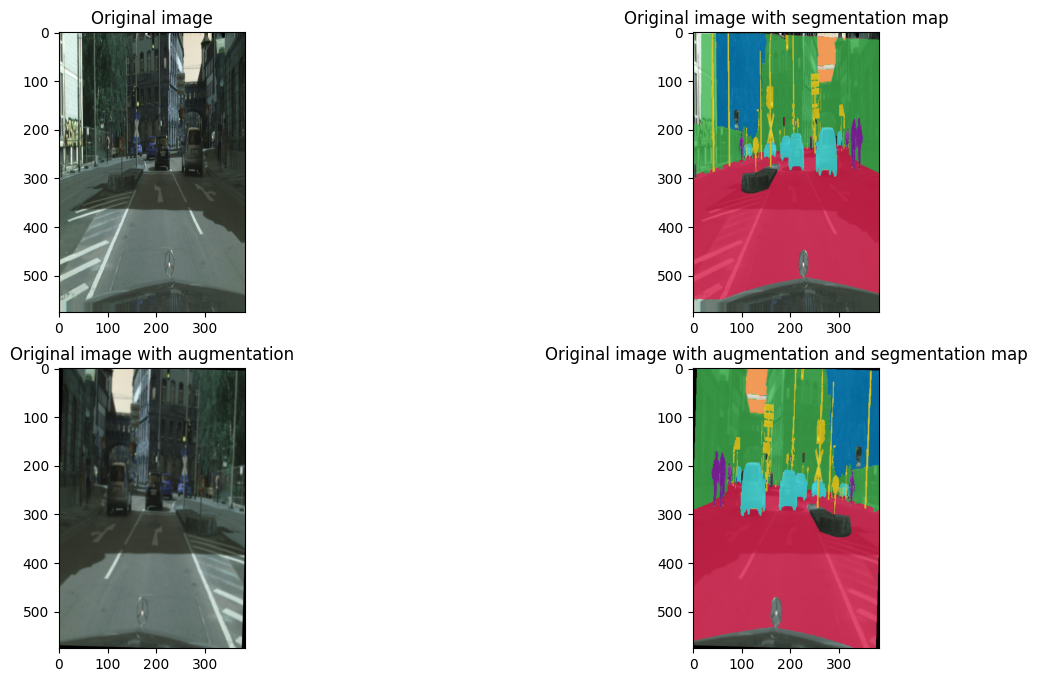

In [12]:
image_name = random.choice(os.listdir(validation_data_folder))
image_path = os.path.join(validation_data_folder, image_name)
image_segmentation_path = os.path.join(validation_labels_folder, image_name)

img = cv2.imread(image_path)
seg = cv2.imread(image_segmentation_path)[:,:,:1]
segmap = SegmentationMapOnImage(seg, shape=img.shape, nb_classes=8)

image_aug, segmap_aug = augment_seg(img, seg)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 8))
axes[0,0].imshow(img)
axes[0,0].set_title("Original image")
axes[0,1].imshow(segmap.draw_on_image(img))
axes[0,1].set_title("Original image with segmentation map")

axes[1,0].imshow(image_aug)
axes[1,0].set_title("Original image with augmentation")
axes[1,1].imshow(segmap_aug.draw_on_image(image_aug))
axes[1,1].set_title("Original image with augmentation and segmentation map")

plt.show()

# Training model without data augmentation

⚠️⚠️⚠️

Be careful. For the following of this notebook, we modified our data_segmentation library to implement saving the history of the training. At the time I'm writing those lines, it is not yet merged in the master branch of the library. You can find the modification I did [here](https://github.com/divamgupta/image-segmentation-keras/pull/303/files#diff-8a1f8d1375947a8271f4407d820b464ca1c132ff4cb48c412069729a203054f3L200-R212).

⚠️⚠️⚠️

We chose to train two different models, Unet and PSPNet. We will train them without data augmentation to see how they perform and then we will train them with data augmentation to see if it improves the results.

## Unet

In [22]:
import pickle
from datetime import datetime

from keras_segmentation.models.unet import unet
from keras.callbacks import ModelCheckpoint
from keras_segmentation.train import train

model = unet(n_classes=8,input_height=384, input_width=576)

weights_path = None

# Creating checkpoint folder
checkpoint_folder = f"tmp\{model.model_name}\{datetime.now().strftime('%Y-%m-%d_%H-%M-%S')}"
print(f"checkpoint_folder : {checkpoint_folder}")
if not os.path.exists(checkpoint_folder):
    os.makedirs(checkpoint_folder)

# If there is a checkpoint, load it
if weights_path != None:
    model.load_weights(weights_path)
    print("Model loaded.")


model_checkpoint = ModelCheckpoint(
    os.path.join(checkpoint_folder, model.model_name + "_{epoch:02d}.h5"),
    monitor="categorical_crossentropy",
    verbose=1,
    save_best_only=False,
    save_weights_only=False,)


# Loss is categorical_crossentropy
# Optimizer is adam
# Metrics is accuracy
history = train(
            model,
            train_images =  training_data_folder,
            train_annotations = training_labels_folder,
            checkpoints_path = checkpoint_folder + f"\{model.model_name}.ckpt",
            epochs=5,
            verify_dataset = False,
            callbacks=[model_checkpoint]
            )
    
# Save history
with open(os.path.join(checkpoint_folder, "history.pkl"), "wb") as f:
    pickle.dump(history.history, f)

checkpoint_folder : tmp\unet\2022-10-10_16-25-14
Epoch 1/5


c:\Users\barau\Documents\FormationOpenClassrooms\Projet8\data-segmentation\env\lib\site-packages\keras_segmentation\train.py:171: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history =  model.fit_generator(train_gen, steps_per_epoch,


512/512 [==============================] - ETA: 0s - loss: 1.3556 - accuracy: 0.5762
Epoch 1: saving model to tmp\unet\2022-10-10_16-25-14\unet_01.h5
512/512 [==============================] - 1977s 4s/step - loss: 1.3556 - accuracy: 0.5762
Epoch 2/5
512/512 [==============================] - ETA: 0s - loss: 0.9988 - accuracy: 0.6950
Epoch 2: saving model to tmp\unet\2022-10-10_16-25-14\unet_02.h5
512/512 [==============================] - 1994s 4s/step - loss: 0.9988 - accuracy: 0.6950
Epoch 3/5
512/512 [==============================] - ETA: 0s - loss: 0.9105 - accuracy: 0.7238
Epoch 3: saving model to tmp\unet\2022-10-10_16-25-14\unet_03.h5
512/512 [==============================] - 1994s 4s/step - loss: 0.9105 - accuracy: 0.7238
Epoch 4/5
512/512 [==============================] - ETA: 0s - loss: 0.8626 - accuracy: 0.7387
Epoch 4: saving model to tmp\unet\2022-10-10_16-25-14\unet_04.h5
512/512 [==============================] - 1950s 4s/step - loss: 0.8626 - accuracy: 0.7387
Epoch 

1/1 [==============================] - 0s 390ms/step


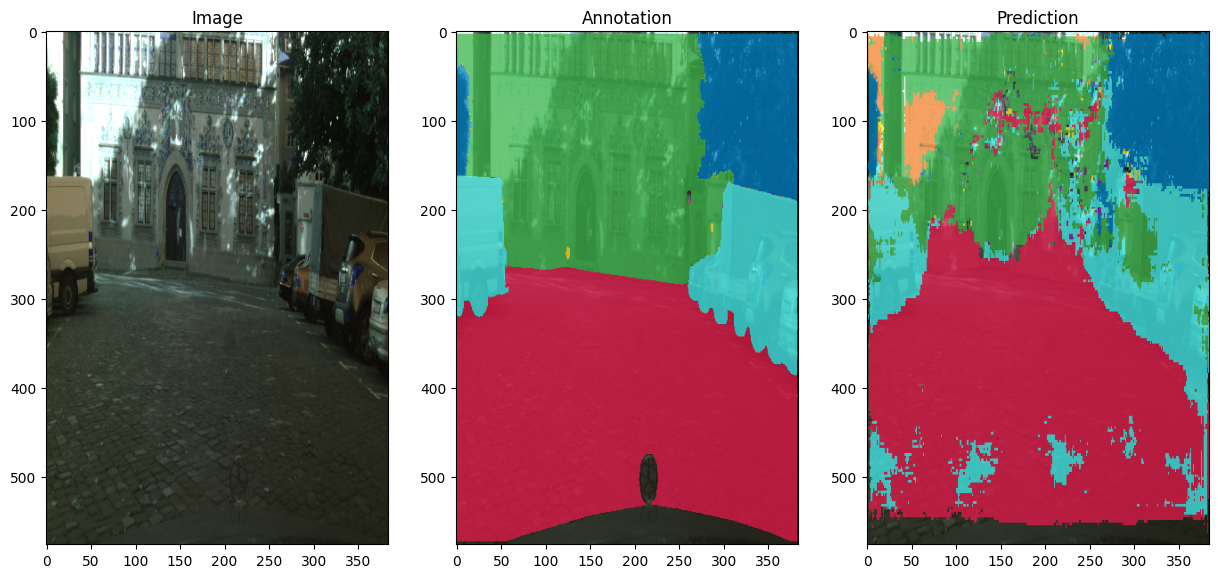

Accuracy : 0.72745943
Mean IoU : 0.39074337
IoU for each class :
    Class flat : 46.3%
    Class human : 73.2%
    Class vehicle : 45.8%
    Class construction : 1.4%
    Class object : 59.6%
    Class nature : 52.3%
    Class sky : 1.0%
    Class void : 33.0%


In [23]:
metrics = evaluate_seg_model(model, validation_data_folder, validation_labels_folder, validation_labels_pred_folder)

## PSPNet

This model has a different architecture using an pretrained CNN model as an encoder (VGG16).
The implementation can be found [here](https://github.com/divamgupta/image-segmentation-keras/blob/b9171a326502587fdd089754234967416631f482/keras_segmentation/models/pspnet.py#L85).

In [19]:
from keras_segmentation.models.pspnet import vgg_pspnet

model = vgg_pspnet(n_classes=8,input_height=384, input_width=576)

weights_path = None

# Creating checkpoint folder
checkpoint_folder = f"tmp\{model.model_name}\{datetime.now().strftime('%Y-%m-%d_%H-%M-%S')}"
print(f"checkpoint_folder : {checkpoint_folder}")
if not os.path.exists(checkpoint_folder):
    os.makedirs(checkpoint_folder)

# If there is a checkpoint, load it
if weights_path != None:
    model.load_weights(weights_path)
    print("Model loaded.")


model_checkpoint = ModelCheckpoint(
    os.path.join(checkpoint_folder, model.model_name + "_{epoch:02d}.h5"),
    monitor='val_loss',
    verbose=1,
    save_best_only=False,
    save_weights_only=False,)

# Loss is categorical_crossentropy
# Optimizer is adam
# Metrics is accuracy
train(
    model,
    train_images =  training_data_folder,
    train_annotations = training_labels_folder,
    checkpoints_path = checkpoint_folder + f"\{model.model_name}.ckpt",
    epochs=5,
    verify_dataset = False,
    callbacks=[model_checkpoint]
    )

checkpoint_folder : tmp\vgg_pspnet\2022-10-10_13-04-17
Epoch 1/5
512/512 [==============================] - ETA: 0s - loss: 1.2196 - accuracy: 0.6265
Epoch 1: saving model to tmp\vgg_pspnet\2022-10-10_13-04-17\vgg_pspnet_01.h5
512/512 [==============================] - 2313s 5s/step - loss: 1.2196 - accuracy: 0.6265
Epoch 2/5
512/512 [==============================] - ETA: 0s - loss: 0.7596 - accuracy: 0.7750
Epoch 2: saving model to tmp\vgg_pspnet\2022-10-10_13-04-17\vgg_pspnet_02.h5
512/512 [==============================] - 2272s 4s/step - loss: 0.7596 - accuracy: 0.7750
Epoch 3/5
512/512 [==============================] - ETA: 0s - loss: 0.6652 - accuracy: 0.7991
Epoch 3: saving model to tmp\vgg_pspnet\2022-10-10_13-04-17\vgg_pspnet_03.h5
512/512 [==============================] - 2305s 5s/step - loss: 0.6652 - accuracy: 0.7991
Epoch 4/5
512/512 [==============================] - ETA: 0s - loss: 0.6121 - accuracy: 0.8113
Epoch 4: saving model to tmp\vgg_pspnet\2022-10-10_13-04-17\v

1/1 [==============================] - 0s 392ms/step


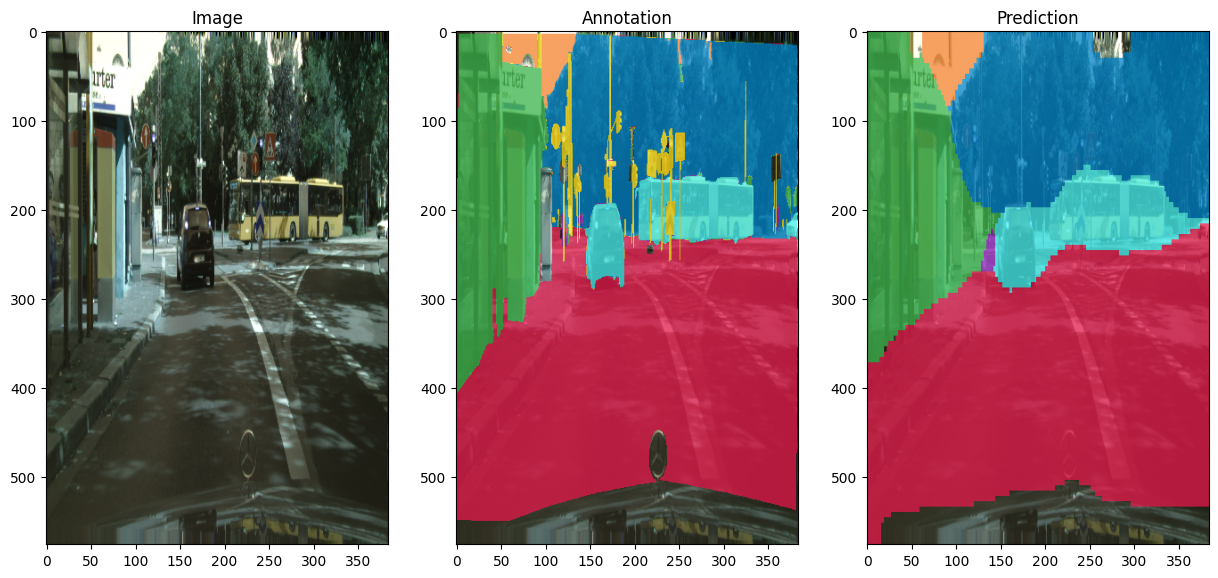

Accuracy : 0.8213614
Mean IoU : 0.43539095
IoU for each class :
    Class flat : 46.3%
    Class human : 85.2%
    Class vehicle : 63.2%
    Class construction : 0.0%
    Class object : 58.7%
    Class nature : 37.7%
    Class sky : 3.3%
    Class void : 53.9%


In [20]:
metrics = evaluate_seg_model(model, validation_data_folder, validation_labels_folder, validation_labels_pred_folder)

# Training with data augmentation

In [24]:
# Data augmentation of 10% of the training data
augment_images(r"processed_data\training_data", r"processed_data\training_labels", 10)

100%|██████████| 85/85 [00:13<00:00,  6.22it/s]


## Unet

In [25]:
model = unet(n_classes=8,input_height=384, input_width=576)

weights_path = None

# Creating checkpoint folder
checkpoint_folder = f"tmp\{model.model_name}_augmented\{datetime.now().strftime('%Y-%m-%d_%H-%M-%S')}"
print(f"checkpoint_folder : {checkpoint_folder}")
if not os.path.exists(checkpoint_folder):
    os.makedirs(checkpoint_folder)

# If there is a checkpoint, load it
if weights_path != None:
    model.load_weights(weights_path)
    print("Model loaded.")


model_checkpoint = ModelCheckpoint(
    os.path.join(checkpoint_folder, model.model_name + "_{epoch:02d}.h5"),
    monitor="categorical_crossentropy",
    verbose=1,
    save_best_only=False,
    save_weights_only=False,)


# Loss is categorical_crossentropy
# Optimizer is adam
# Metrics is accuracy
history = train(
            model,
            train_images =  training_data_folder,
            train_annotations = training_labels_folder,
            checkpoints_path = checkpoint_folder + f"\{model.model_name}.ckpt",
            epochs=5,
            verify_dataset = False,
            callbacks=[model_checkpoint]
            )
    
# Save history
with open(os.path.join(checkpoint_folder, "history.pkl"), "wb") as f:
    pickle.dump(history.history, f)

checkpoint_folder : tmp\unet_augmented\2022-10-10_19-19-16
Epoch 1/5


c:\Users\barau\Documents\FormationOpenClassrooms\Projet8\data-segmentation\env\lib\site-packages\keras_segmentation\train.py:171: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history =  model.fit_generator(train_gen, steps_per_epoch,


512/512 [==============================] - ETA: 0s - loss: 1.4492 - accuracy: 0.5512
Epoch 1: saving model to tmp\unet_augmented\2022-10-10_19-19-16\unet_01.h5
512/512 [==============================] - 1985s 4s/step - loss: 1.4492 - accuracy: 0.5512
Epoch 2/5
512/512 [==============================] - ETA: 0s - loss: 1.0536 - accuracy: 0.6772
Epoch 2: saving model to tmp\unet_augmented\2022-10-10_19-19-16\unet_02.h5
512/512 [==============================] - 1952s 4s/step - loss: 1.0536 - accuracy: 0.6772
Epoch 3/5
512/512 [==============================] - ETA: 0s - loss: 0.9540 - accuracy: 0.7104
Epoch 3: saving model to tmp\unet_augmented\2022-10-10_19-19-16\unet_03.h5
512/512 [==============================] - 1951s 4s/step - loss: 0.9540 - accuracy: 0.7104
Epoch 4/5
512/512 [==============================] - ETA: 0s - loss: 0.9033 - accuracy: 0.7263
Epoch 4: saving model to tmp\unet_augmented\2022-10-10_19-19-16\unet_04.h5
512/512 [==============================] - 1956s 4s/step 

1/1 [==============================] - 0s 367ms/step


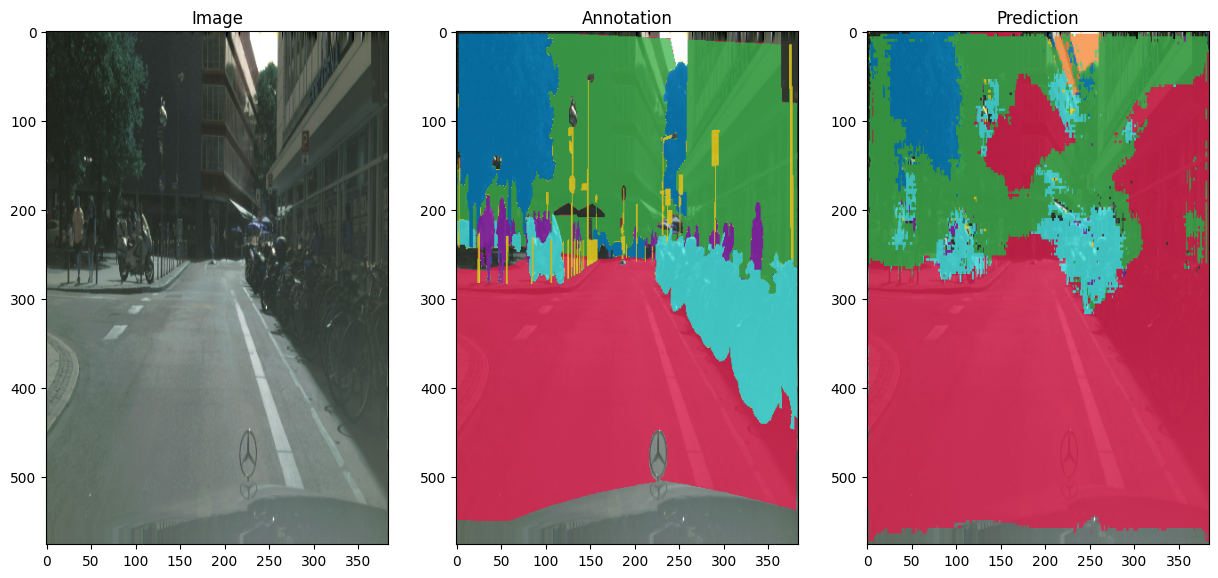

Accuracy : 0.73833907
Mean IoU : 0.3932497
IoU for each class :
    Class flat : 46.6%
    Class human : 73.9%
    Class vehicle : 49.3%
    Class construction : 0.6%
    Class object : 58.4%
    Class nature : 50.8%
    Class sky : 1.5%
    Class void : 33.5%


In [26]:
metrics = evaluate_seg_model(model, validation_data_folder, validation_labels_folder, validation_labels_pred_folder)

## PSPNet

In [27]:
model = vgg_pspnet(n_classes=8,input_height=384, input_width=576)

weights_path = None

# Creating checkpoint folder
checkpoint_folder = f"tmp\{model.model_name}_augmented\{datetime.now().strftime('%Y-%m-%d_%H-%M-%S')}"
print(f"checkpoint_folder : {checkpoint_folder}")
if not os.path.exists(checkpoint_folder):
    os.makedirs(checkpoint_folder)

# If there is a checkpoint, load it
if weights_path != None:
    model.load_weights(weights_path)
    print("Model loaded.")


model_checkpoint = ModelCheckpoint(
    os.path.join(checkpoint_folder, model.model_name + "_{epoch:02d}.h5"),
    monitor='val_loss',
    verbose=1,
    save_best_only=False,
    save_weights_only=False,)

# Loss is categorical_crossentropy
# Optimizer is adam
# Metrics is accuracy
train(
    model,
    train_images =  training_data_folder,
    train_annotations = training_labels_folder,
    checkpoints_path = checkpoint_folder + f"\{model.model_name}.ckpt",
    epochs=5,
    verify_dataset = False,
    callbacks=[model_checkpoint]
    )

checkpoint_folder : tmp\vgg_pspnet_augmented\2022-10-10_22-03-33
Epoch 1/5
512/512 [==============================] - ETA: 0s - loss: 1.3005 - accuracy: 0.5757
Epoch 1: saving model to tmp\vgg_pspnet_augmented\2022-10-10_22-03-33\vgg_pspnet_01.h5
512/512 [==============================] - 2299s 4s/step - loss: 1.3005 - accuracy: 0.5757
Epoch 2/5
512/512 [==============================] - ETA: 0s - loss: 0.7651 - accuracy: 0.7662
Epoch 2: saving model to tmp\vgg_pspnet_augmented\2022-10-10_22-03-33\vgg_pspnet_02.h5
512/512 [==============================] - 2347s 5s/step - loss: 0.7651 - accuracy: 0.7662
Epoch 3/5
512/512 [==============================] - ETA: 0s - loss: 0.6716 - accuracy: 0.7921
Epoch 3: saving model to tmp\vgg_pspnet_augmented\2022-10-10_22-03-33\vgg_pspnet_03.h5
512/512 [==============================] - 2360s 5s/step - loss: 0.6716 - accuracy: 0.7921
Epoch 4/5
512/512 [==============================] - ETA: 0s - loss: 0.6267 - accuracy: 0.8032
Epoch 4: saving model

1/1 [==============================] - 0s 392ms/step


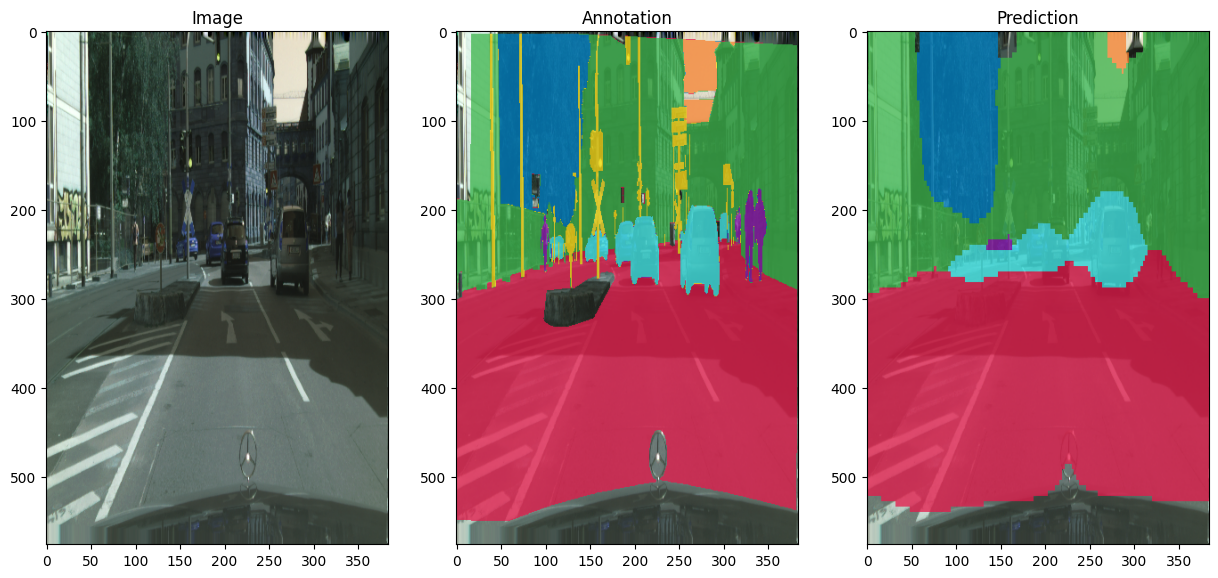

Accuracy : 0.8100406
Mean IoU : 0.42575717
IoU for each class :
    Class flat : 44.1%
    Class human : 83.1%
    Class vehicle : 60.3%
    Class construction : 0.0%
    Class object : 57.1%
    Class nature : 39.8%
    Class sky : 5.5%
    Class void : 50.8%


In [28]:
metrics = evaluate_seg_model(model, validation_data_folder, validation_labels_folder, validation_labels_pred_folder)

# Use of a generator

For this notebook, we used the library keras_segmentation. It helped importing, loading and training the model.


As the name suggests, it really depends on keras library and add a wrapper around it.


Unfortunately, with this library, the only possible input of the train method is a path to the folder with the images to train and evaluate on.


However, this library DOES use a generator to fit the model, as we can see [here](https://github.com/divamgupta/image-segmentation-keras/blob/ef4cc5194bf50b0f2f0ebf104ec8897feff63002/keras_segmentation/train.py#L168). I read the whole source code of the library and I currently able to understand and implement by myself a generator (as described by tensorflow).